# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [10]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [11]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()
vault_db_path = data_folder / "vault-db.pickle"

vault_db: VaultDatabase = pickle.load(open(vault_db_path, "rb"))

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 11,832 vaults in the database and 10,334,740 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [12]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Period selection

- Choose the period we want to examine
- Comment out the trim operation if you want to examine the latest data

In [13]:

last_sample_at = prices_df.index[-1]
three_months_ago = last_sample_at - pd.DateOffset(months=3)

PERIOD = [
    three_months_ago,
    last_sample_at,
]

mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[mask]
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Trimmed period contains {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Trimmed period contains 381,483 price rows across all vaults on Arbitrum.


chain                                     address  \
timestamp                                                                
2025-06-14 01:14:48  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 02:14:52  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 03:14:57  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 04:15:04  42161  0x004626a008b1acdc4c74ab51644093b155e59a23   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2025-06-14 01:14:48     347101121         1.08    308,174.45    285,207.24   
2025-06-14 02:14:52     347115521         1.08    308,175.46    285,207.24   
2025-06-14 03:14:57     347129921         1.08    308,176.47    285,207.24   
2025-06-14 04:15:04     347144321         1.08    308,177.49    285,207.24   

                     performance_fee  management_fee errors  \
timestamp                                                     
2025-06-14 01:14:48              NaN             NaN          
2025-06-14 02:14:52              NaN             NaN          
2025-06-14 03:14:57              NaN             NaN          
2025-06-14 04:15:04              NaN             NaN          

                                                                   id  \
timestamp                                                               
2025-06-14 01:14:48  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 02:14:52  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 03:14:57  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   
2025-06-14 04:15:04  42161-0x004626a008b1acdc4c74ab51644093b155e59a23   

                            name  event_count            protocol  \
timestamp                                                           
2025-06-14 01:14:48  Staked EURA        74870  <unknown ERC-4626>   
2025-06-14 02:14:52  Staked EURA        74870  <unknown ERC-4626>   
2025-06-14 03:14:57  Staked EURA        74870  <unknown ERC-4626>   
2025-06-14 04:15:04  Staked EURA        74870  <unknown ERC-4626>   

                     raw_share_price  pct_change_prev  pct_change_next  \
timestamp                                                                
2025-06-14 01:14:48             1.08             0.00             0.00   
2025-06-14 02:14:52             1.08             0.00             0.00   
2025-06-14 03:14:57             1.08             0.00             0.00   
2025-06-14 04:15:04             1.08             0.00             0.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2025-06-14 01:14:48        0.00         1,131,648.26              22,632.97   
2025-06-14 02:14:52        0.00         1,131,648.26              22,632.97   
2025-06-14 03:14:57        0.00         1,131,648.26              22,632.97   
2025-06-14 04:15:04        0.00         1,131,648.26              22,632.97   

                     tvl_filtering_mask  
timestamp                                
2025-06-14 01:14:48               False  
2025-06-14 02:14:52               False  
2025-06-14 03:14:57               False  
2025-06-14 04:15:04               False

## Filter vaults

- Choose vaults on our chain

In [14]:
vault_db
vault_db = {spec: vault for spec, vault in vault_db.items() if spec.chain_id == selected_chain_id}
vault_df = prices_df[prices_df["chain"] == selected_chain_id]

print(f"We have total of {len(vault_db):,} vaults on chain {chain_name}, with {len(vault_df):,} rows.")

We have total of 2,297 vaults on chain Arbitrum, with 381,483 rows.


## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [15]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.5,  # 50% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/292 [00:00<?, ?it/s]

Cleaning metrics for 292 vaults
Vault entries with too high NAV values filtered out: 0
Vault entries with too small ATH NAV values filtered out: 78
Vaults abnormally high returns: 9
Vault entries with too few deposit and redeem events (min 25) filtered out: 19
Calculated lifetime metrics for 178 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  cagr  \
72   Peapods Interest Bearing USDC - 6             0.06  0.28   
177                             gmUSDC            -0.01 -0.03   

     three_months_returns  three_months_cagr  one_month_returns  \
72                   0.06               0.27               0.02   
177                 -0.01              -0.03               0.02   

     one_month_cagr  three_months_volatility denomination     chain  \
72             0.24                     0.00         USDC  Arbitrum   
177            0.23                     0.01         USDC  Arbitrum   

        peak_nav  current_nav  years  mgmt_fee  perf_fee  event_count  \
72  4,599,069.91 3,925,516.18   0.25       NaN       NaN         7764   
177   332,148.84   212,908.48   0.25       NaN       NaN         2412   

               protocol                                                id  \
72              Peapods  42161-0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f   
177  <unknown ERC-4626>  42161-0x959f3807f0aa7921e18c78b00b2819ba91e52fef   

             start_date            end_date  
72  2025-08-15 00:54:02 2025-09-14 00:08:44  
177 2025-08-15 00:54:02 2025-09-14 00:08:44

## Top vault list

- List top vaults on the chain, formatted for readability



In [ ]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df.head(50),
    add_index=True,
    add_address=True,
)

# Script output
print(f"Top 25 vaults by 1 month annualised return are: {', '.join(formatted_df.head(25)['Name'])})")
print(f"Top 25 vaults by 1 month annualised return are: {', '.join(formatted_df.head(25)['Address'])})")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 88 vaults.
Top 25 vaults by 1 month annualised return are: 0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f, 0x959f3807f0aa7921e18c78b00b2819ba91e52fef, 0xeba51f6472f4ce1c47668c2474ab8f84b32e1ae7, 0x407d3d942d0911a2fea7e22417f81e27c02d6c6f, 0xb739ae19620f7ecb4fb84727f205453aa5bc1ad2, 0x36b69949d60d06eccc14de0ae63f4e00cc2cd8b9, 0x79f76e343807ea194789d114e61be6676e6bbeda, 0xa53cf822fe93002aeae16d395cd823ece161a6ac, 0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9, 0xd3443ee1e91af28e5fb858fbd0d72a63ba8046e0, 0x9fa306b1f4a6a83fec98d8ebbabedff78c407f6b, 0xc8248953429d707c6a2815653eca89846ffaa63b, 0xea50f402653c41cadbafd1f788341db7b7f37816, 0x8a1ef3066553275829d1c0f64ee8d5871d5ce9d3, 0xa7781f1d982eb9000bc1733e29ff5ba2824cdbe5, 0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58, 0x6ca200319a0d4127a7a473d6891b86f34e312f42, 0xd691d8e3bc5008708786114481714b9c636f766f, 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9, 0xd46993f25d298ebbcd31e941156c66f7e628a52a, 0x0df2e3a0b5

Name Lifetime return  \
#                                                                       
1                   Peapods Interest Bearing USDC - 6           6.31%   
2                                              gmUSDC          -0.72%   
3                              Curve Vault for crvUSD           4.42%   
4                             Autopilot USDC Arbitrum           0.16%   
5    Silo Finance Borrowable USDC Deposit in ARB Silo           2.84%   
6                                    Yearn Degen USDC           0.07%   
7                       BasisOS USDC-LINK Hyperliquid           2.59%   
8                              Clearstar USDC Reactor           0.13%   
9   Silo Finance Borrowable USDC Deposit, SiloId: 146           0.30%   
10                                 Gains Network USDC           2.73%   
11                                      USDC-2 yVault           2.43%   
12                             Curve Vault for crvUSD           2.36%   
13                                        Savings GYD           3.00%   
14                            Yield Chasing Silo USDC           2.24%   
15                               Yield Chasing crvUSD           2.34%   
16                           LazyVault_LowerRisk_USDC           1.58%   
17                          Nashpoint DeFi & RWA Fund           1.24%   
18                                           FARM_DAI           1.91%   
19                                              USDn2           2.49%   
20                    Short Volatility - WETH/USDCe-P           6.16%   
21                                 Yield Chasing USDC           2.13%   
22                                  Singularity Vault           5.92%   
23                                     Dolomite: USDC           2.02%   
24                                         Saving USX           1.72%   
25                                     Hyperithm USDC           0.17%   
26                      BasisOS USDC-WBTC Hyperliquid           1.89%   
27                                  Gains Network DAI           1.55%   
28                 Peapods Interest Bearing USDC - 22           0.46%   
29                             Curve Vault for crvUSD           1.03%   
30                                        Staked USDX           1.64%   
31                                   Spark USDC Vault           1.14%   
32                                  EVK Vault eUSDC-1           0.97%   
33                       ERC4626-Wrapped Aave v3 USDC           1.06%   
34                          Static Aave Arbitrum USDC           1.06%   
35                         Static Aave Arbitrum USDCn           1.06%   
36                        Wrapped Aave Arbitrum USDCn           1.06%   
37  Silo Finance Borrowable USDC Deposit, SiloId: 145           0.20%   
38                                Rapidz Aave v3 USDC           0.98%   
39                          Wrapped Aave Arbitrum GHO           1.06%   
40                                  EVK Vault eUSDC-5           0.13%   
41               Crypto.com Defi Wallet Compound USDC           0.92%   
42                   Crypto.com Defi Wallet AAVE USDC           0.90%   
43                    Concrete USDC MultiSig Strategy           0.29%   
44                                    Fluid Gho Token           0.38%   
45                                  EVK Vault eUSDC-2           0.22%   
46                                     Fluid USD Coin           1.15%   
47                                  EVK Vault eUSDC-6           0.01%   
48                                   MEV Capital USDC           0.70%   
49                                    Euler Earn USDC           0.10%   
50                                        Staked EURA           0.74%   

   Lifetime return ann. 3M return 3M return ann. 1M return 1M return ann.  \
#                                                                           
1                27.84%     6.05%         27.28%     1.72%         23.89%   
2                -2.8

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

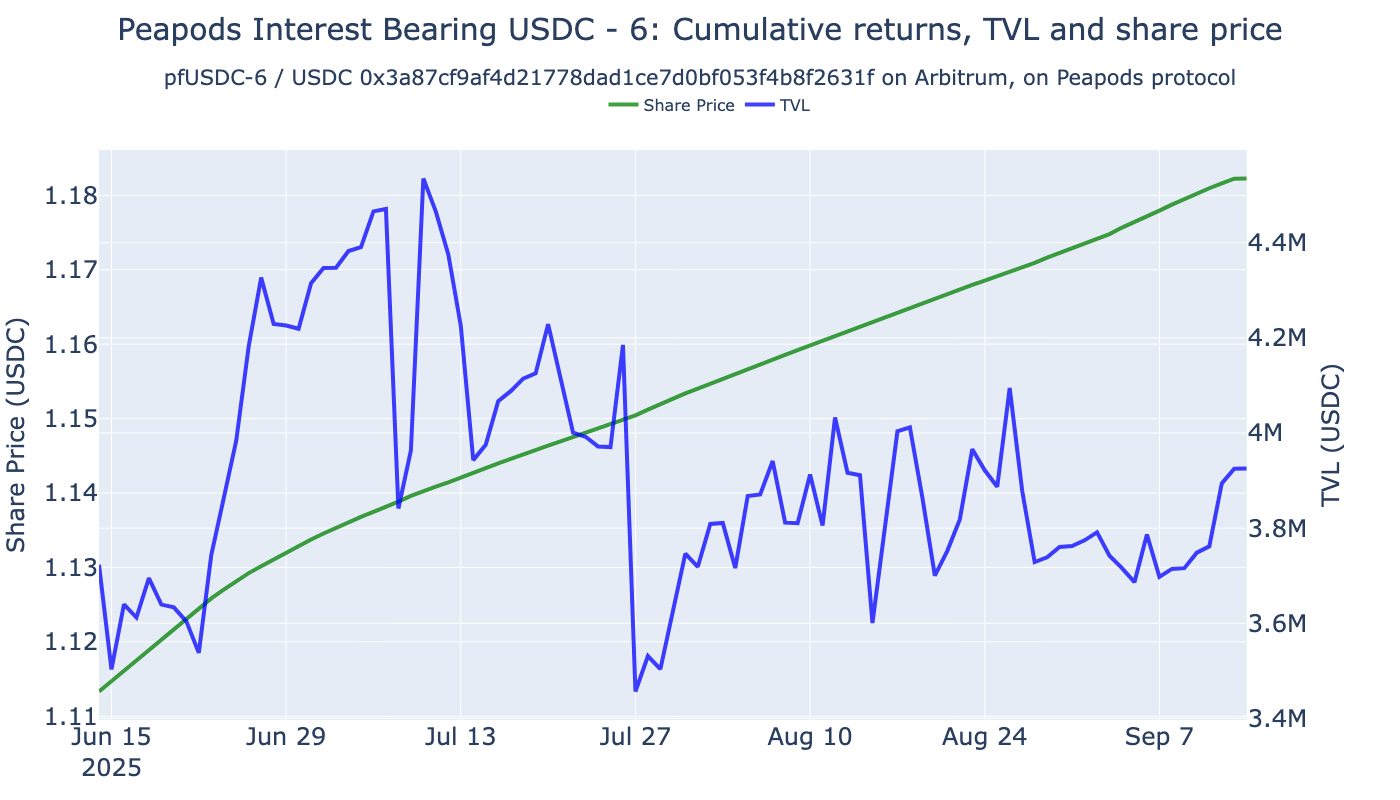

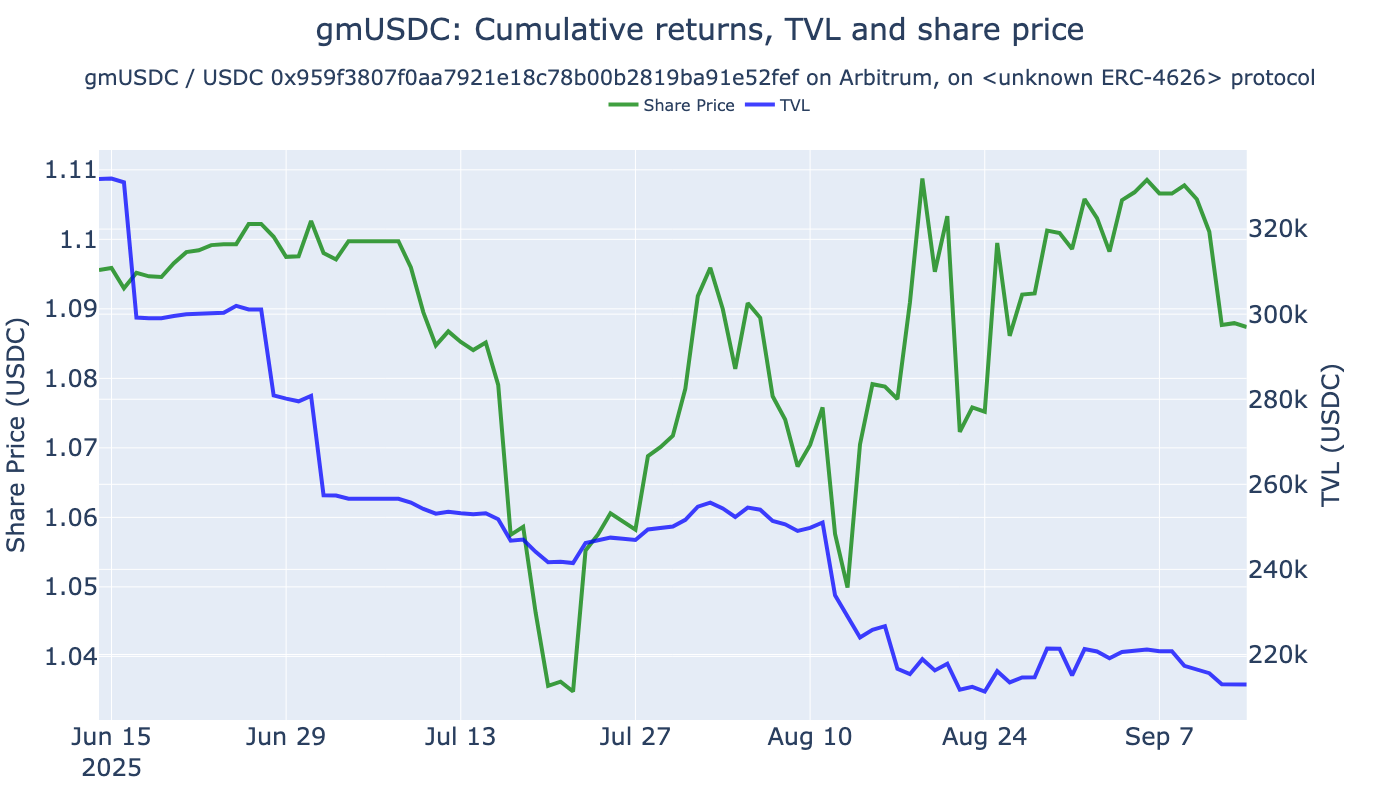

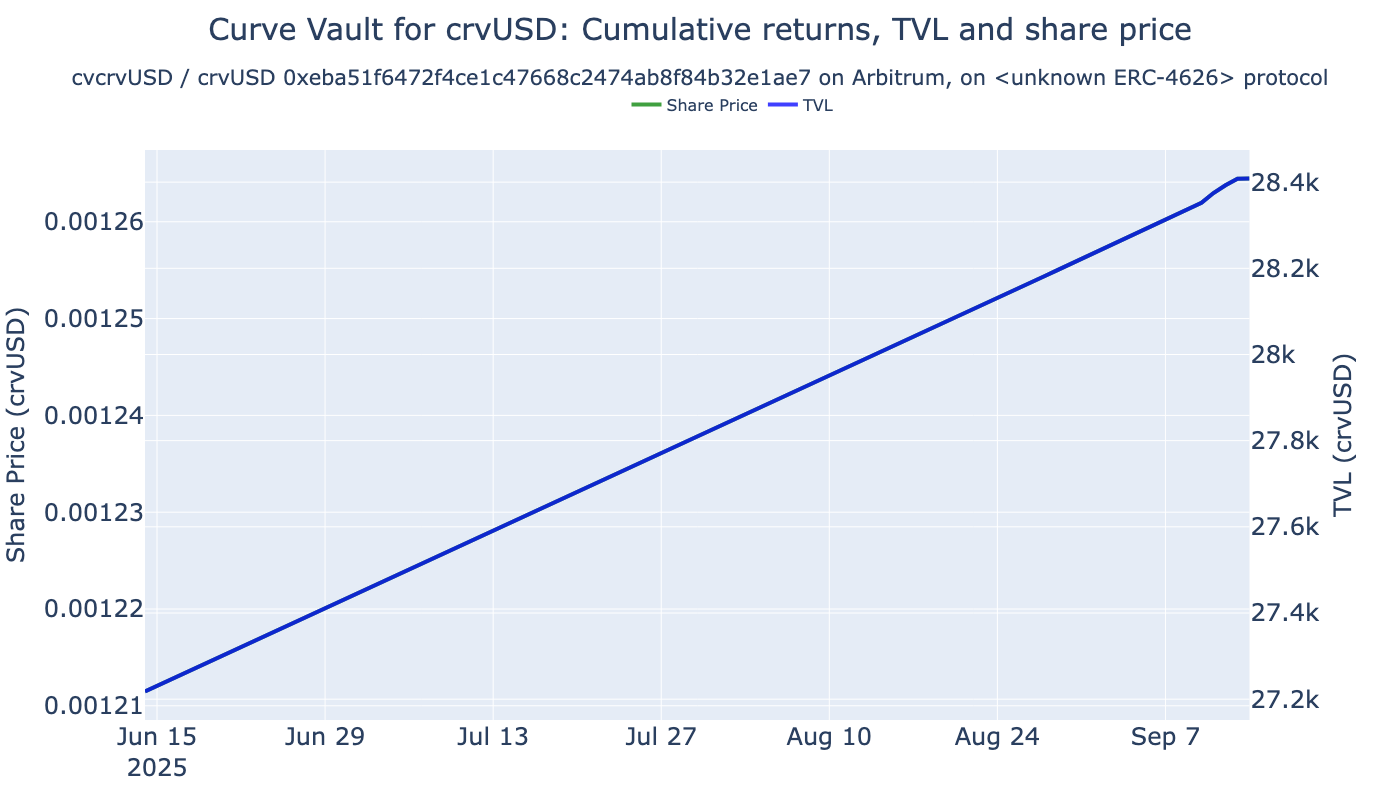

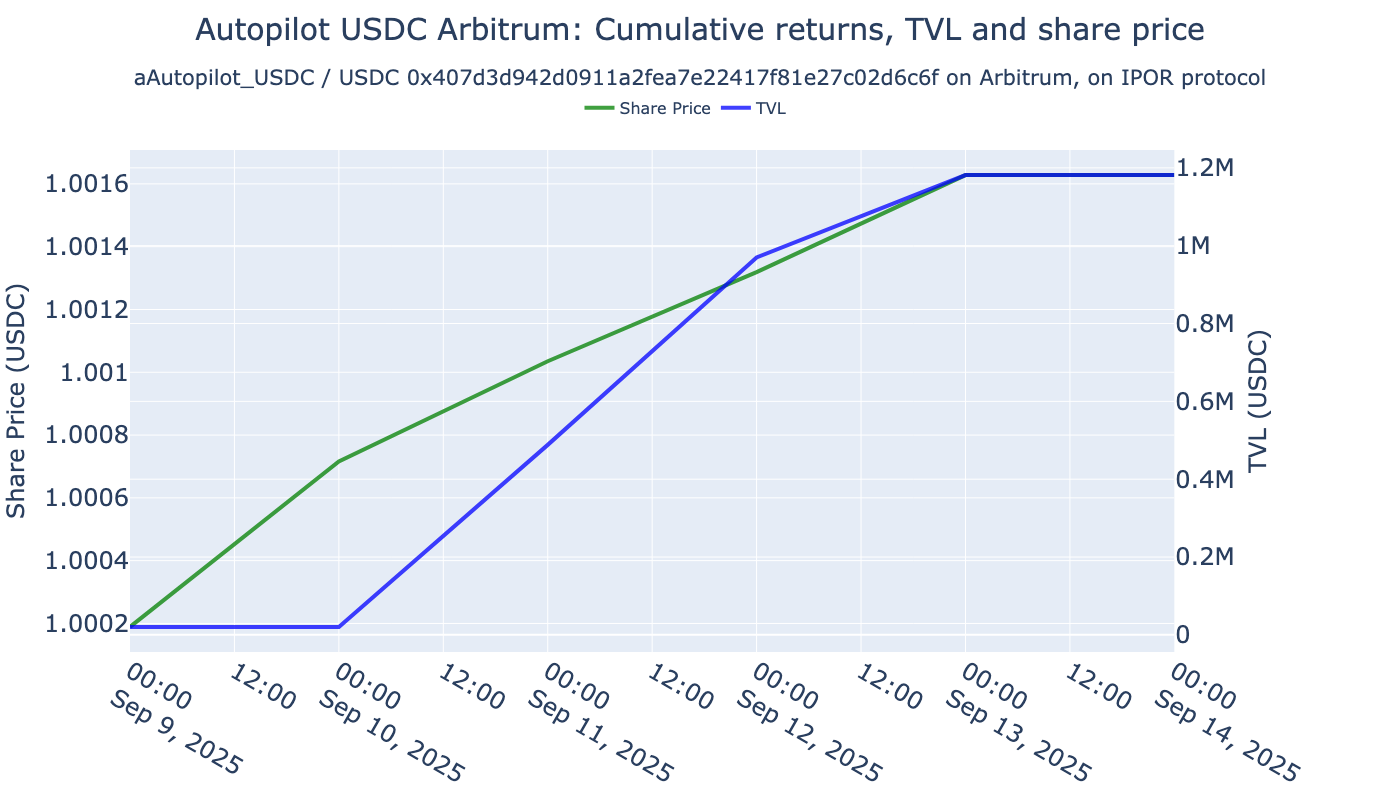

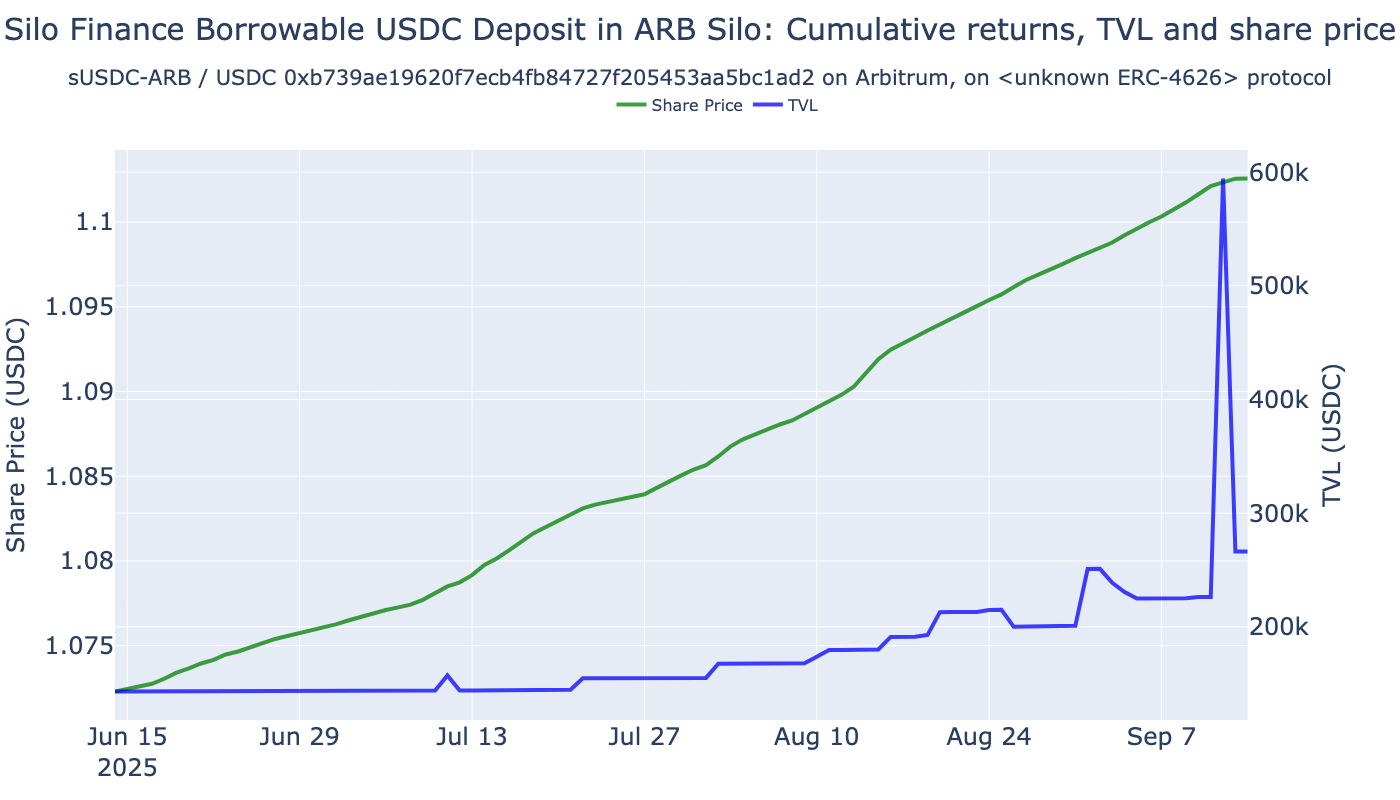

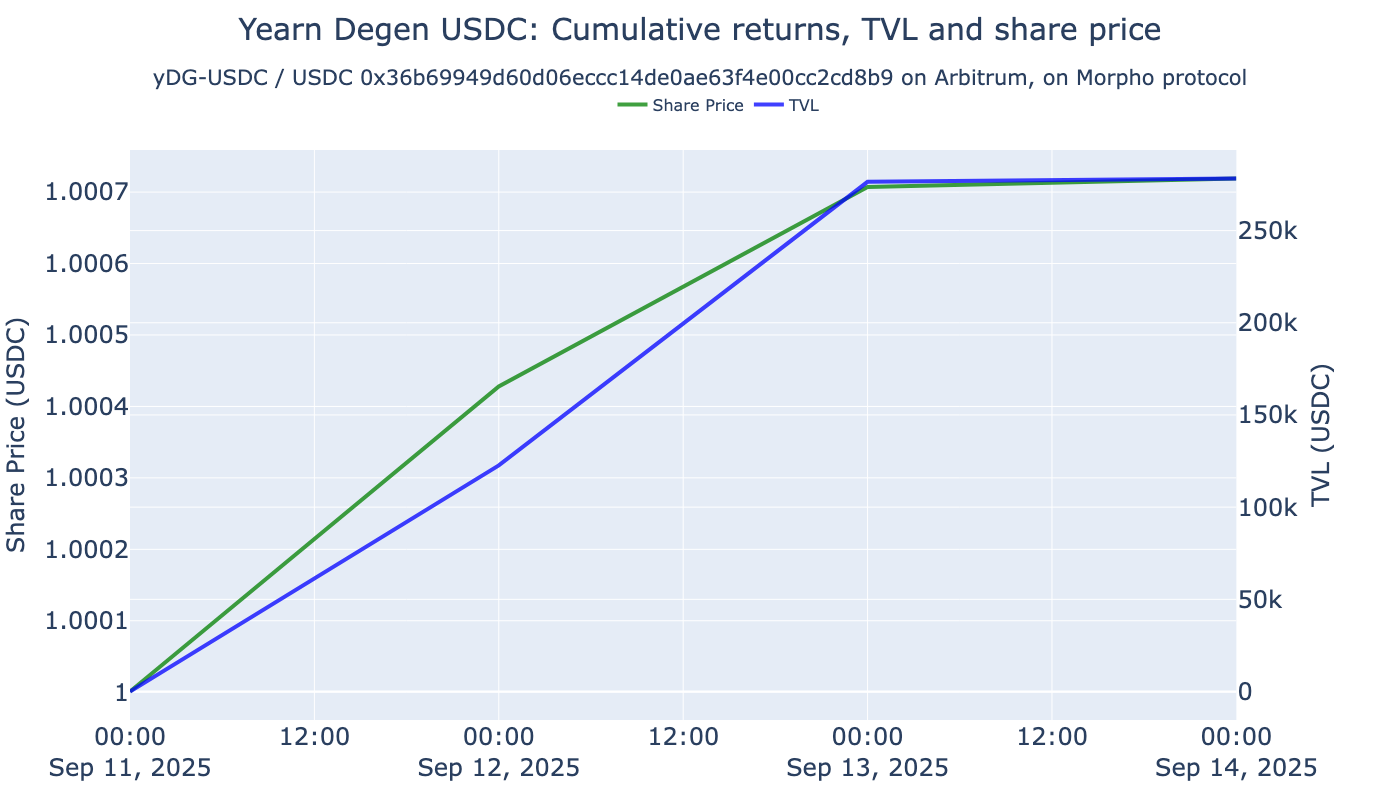

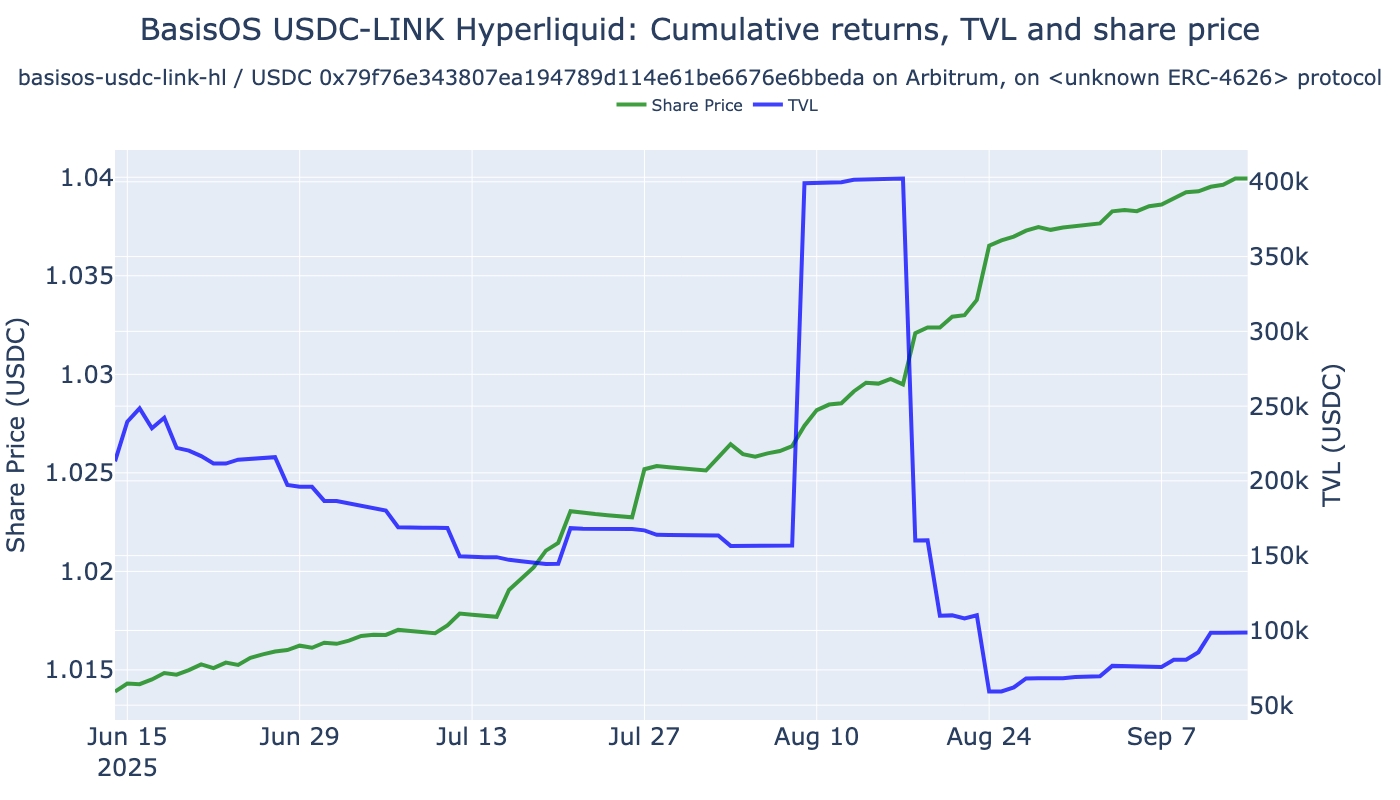

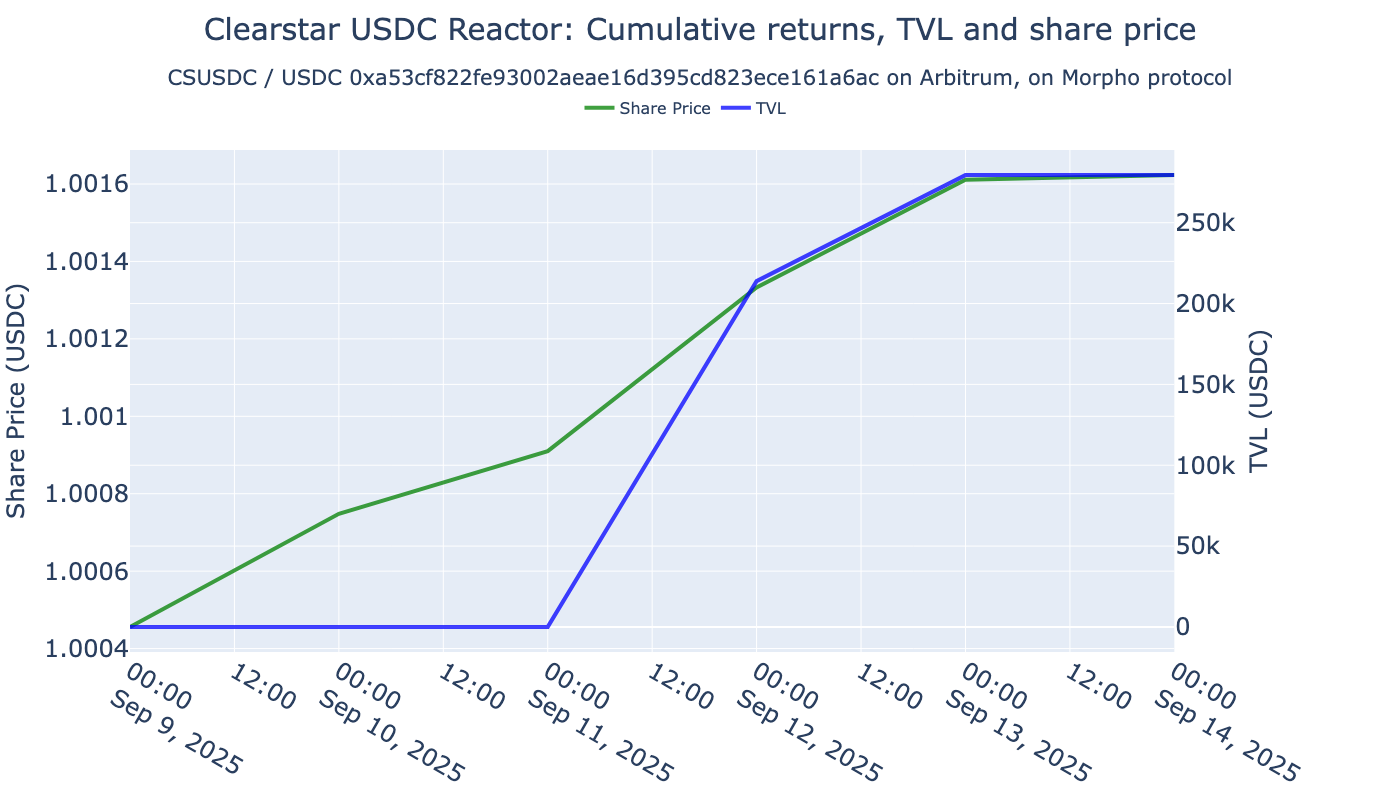

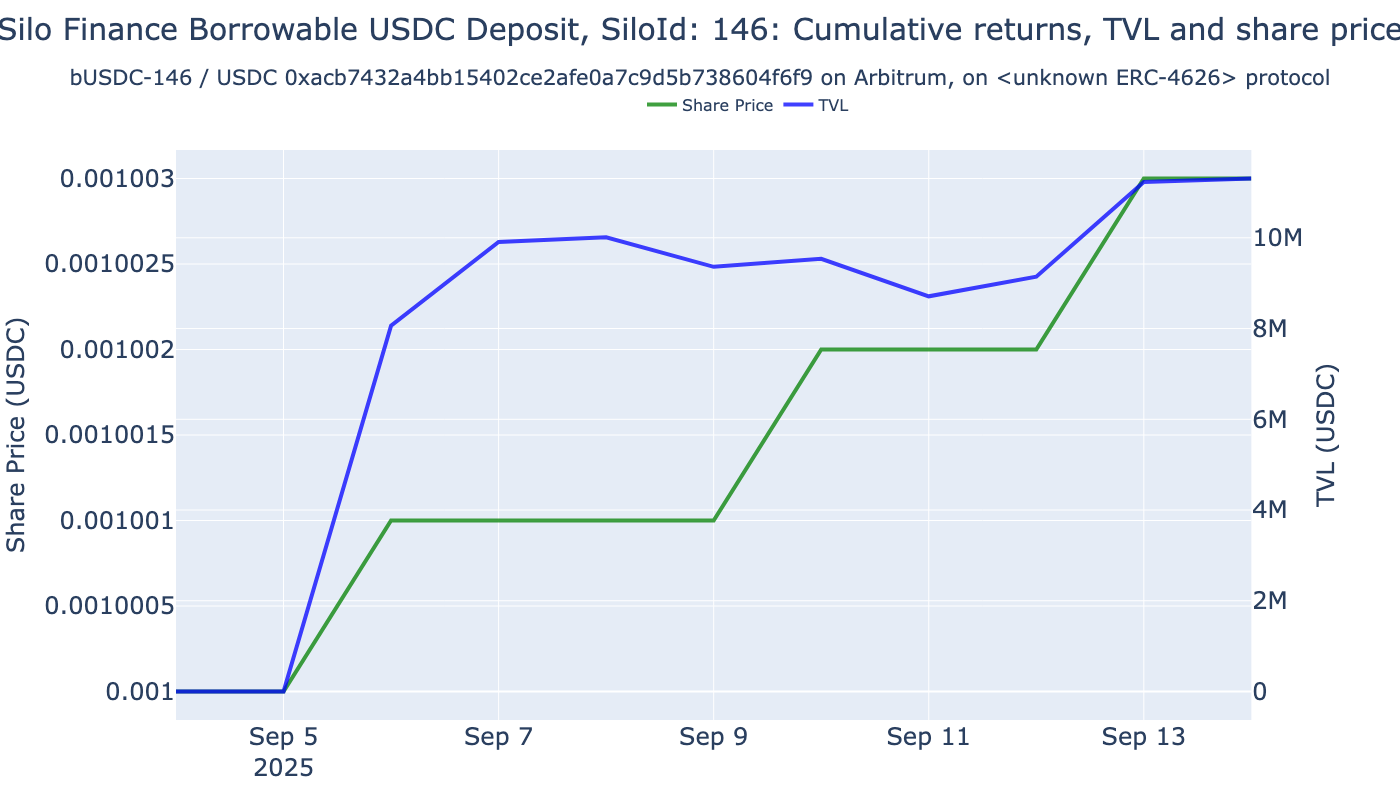

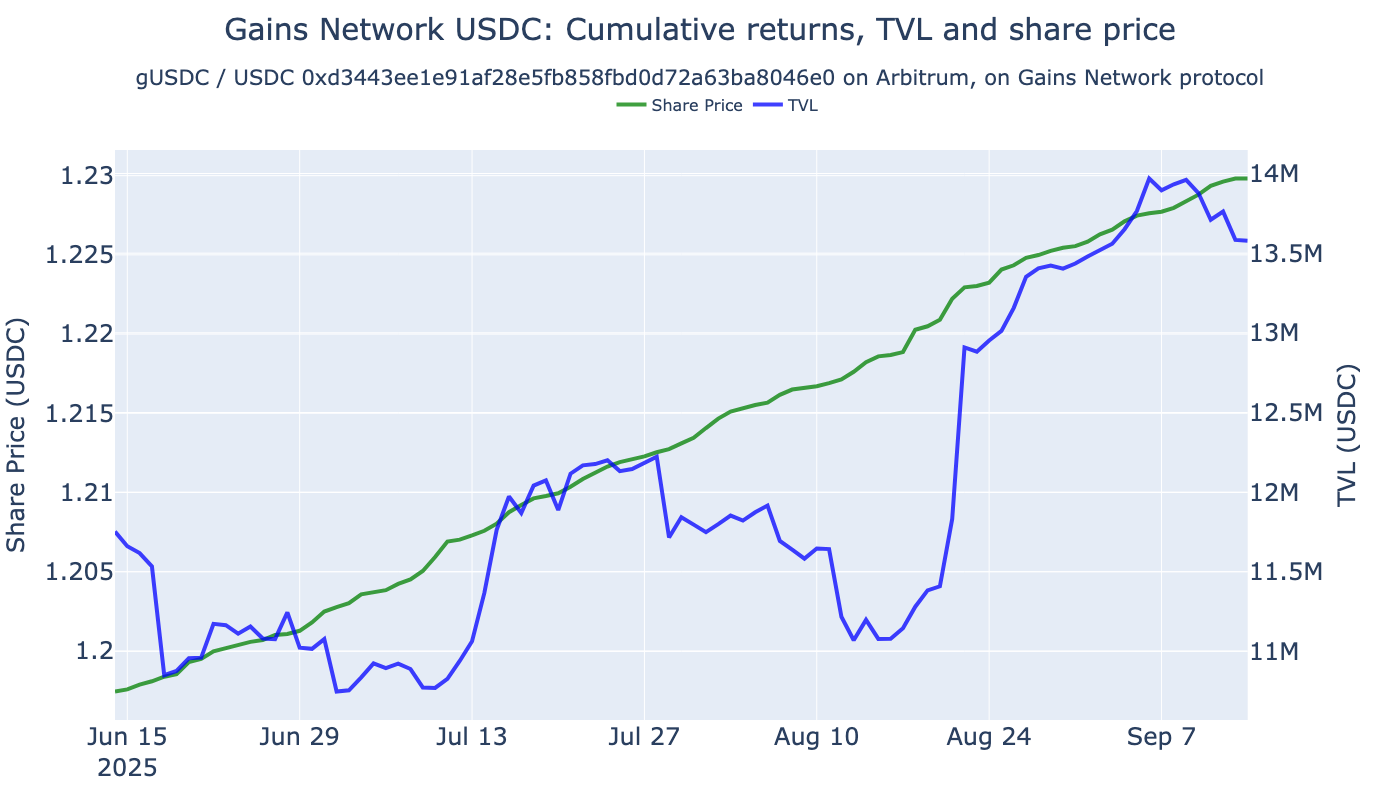

In [17]:
from eth_defi.research.vault_metrics import analyse_vault, format_ffn_performance_stats
from eth_defi.chain import get_chain_name
from eth_defi.research.value_table import format_series_as_multi_column_grid

from tabulate import tabulate
from IPython.display import display, HTML

interest_vault_specs = []

for idx, row in lifetime_data_filtered_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    vault_report = analyse_vault(
        vault_db=vault_db,
        prices_df=prices_df,
        spec=vault_spec,
        chart_frequency="daily",
        logger=lambda x: None,
    )

    chain_name = get_chain_name(vault_spec.chain_id)
    vault_name = vault_report.vault_metadata["Name"]
    display(HTML(f"<h2>Vault {vault_name} ({chain_name}): {vault_spec.vault_address})</h2><br>"))

    # Display returns figur
    returns_chart_fig = vault_report.rolling_returns_chart
    returns_chart_fig.show()

    # Check raw montly share price numbers for each vault
    hourly_price_df = vault_report.hourly_df
    last_price_at = hourly_price_df.index[-1]
    last_price = hourly_price_df["share_price"].asof(last_price_at)
    last_block = hourly_price_df["block_number"].asof(last_price_at)
    month_ago = last_price_at - pd.DateOffset(months=1)
    month_ago_price = hourly_price_df["share_price"].asof(month_ago)
    month_ago_block = hourly_price_df["block_number"].asof(month_ago)

    # Price may be NA if vault is less than month old
    # assert not pd.isna(month_ago_price), f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: no price data for month ago {month_ago} found, last price at {last_price_at} is {last_price}"

    data = {
        "Vault": f"{vault_name} ({chain_name})",
        "Last price at": last_price_at,
        "Last price": last_price,
        "Block last price": f"{month_ago_block:,}",
        "Month ago": month_ago,
        "Block month ago": f"{month_ago_block:,}",
        "Month ago price": month_ago_price,
        "Monthly change %": (last_price - month_ago_price) / month_ago_price * 100,
    }

    df = pd.Series(data)
    # display(df)

    # Display FFN stats
    performance_stats = vault_report.performance_stats
    if performance_stats is not None:
        stats_df = format_ffn_performance_stats(performance_stats)

        multi_column_df = format_series_as_multi_column_grid(stats_df)

        # display(stats_df)
        display(HTML(multi_column_df.to_html(float_format='{:,.2f}'.format, index=True)))
    else:
        print(f"Vault {vault_spec.chain_id}-{vault_spec.vault_address}: performance metrics not available, is quantstats library installed?")

## Rolling returns comparison

- Show rolling returns of all picked vaults

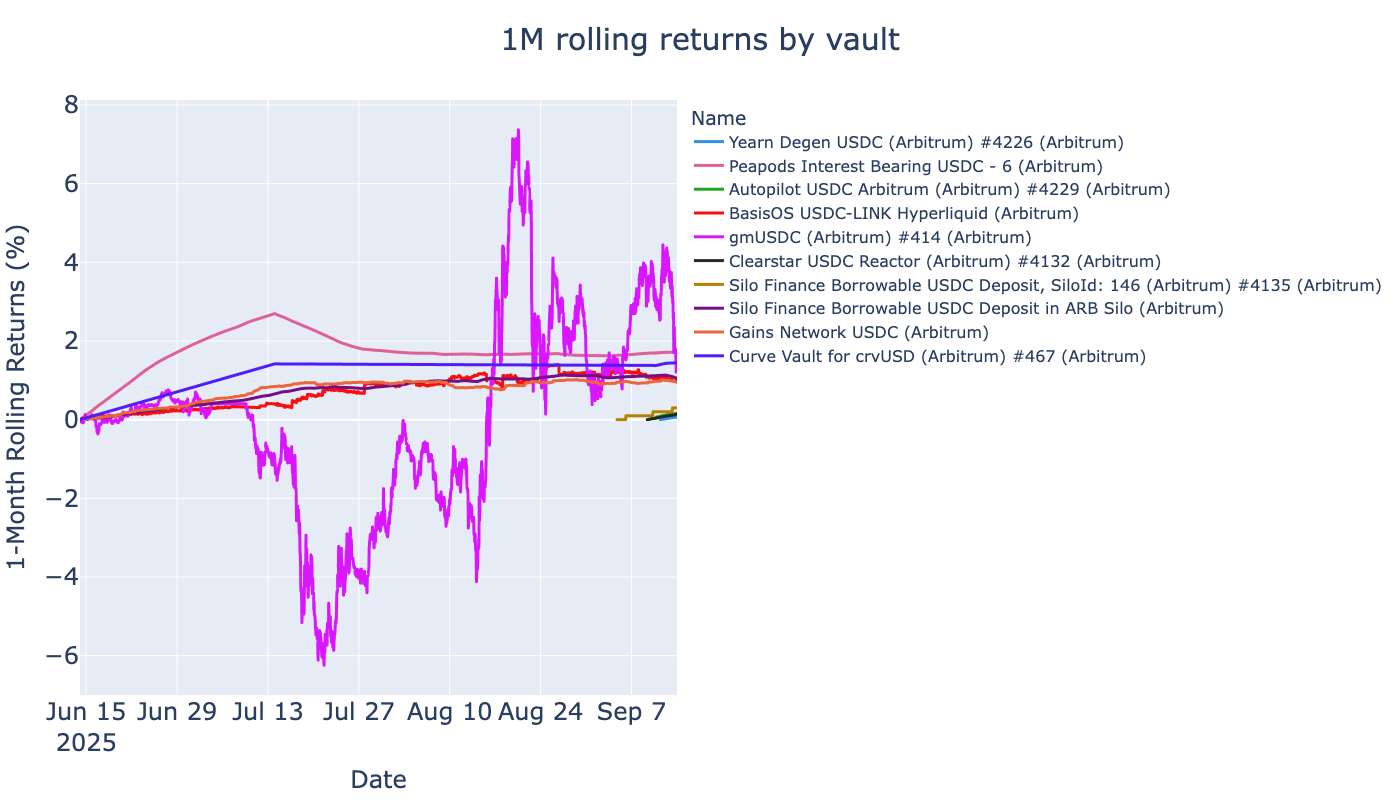

In [26]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()